# Fundamentals of Data Science - Week 5 and Week 6

###  <span style='color: green'>Use case 2: Business - assignment at bottom of the notebook. Due date: 28/10/18 23:59</span> 

In this notebook, the first section is going to cover the following practical aspects of data science:
+ Creating a Linear Regression model
+ Predicting the model on unseen data and calculating error on the predicted score vs orginal score
+ Create a simple linear regression (with a single variable and a target) on the Diabetes dataset
+ Fit a linear model on the data and plot it
+ Create multivariate linear regression to predict house prices in Boston
+ Plot correlation between variables, predicted price vs original price and calculate mean square errors 


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


<h3> Single Variable Linear regression </h3>

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#Construct a data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(diabetes_X, diabetes.target)), columns = ['feature', 'Target'])

,feature,Target
0,[0.0616962065186885],151.0
1,[-0.0514740612388061],75.0
2,[0.0444512133365941],141.0
3,[-0.0115950145052127],206.0
4,[-0.0363846922044735],135.0
5,[-0.0406959404999971],97.0
6,[-0.0471628129432825],138.0
7,[-0.00189470584028465],63.0
8,[0.0616962065186885],110.0
9,[0.0390621529671896],310.0


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


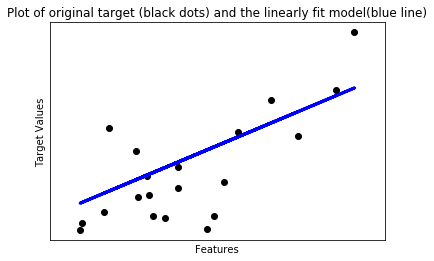

In [3]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel("Features")
plt.ylabel("Target Values")
plt.title("Plot of original target (black dots) and the linearly fit model(blue line)")

plt.xticks(())
plt.yticks(())


plt.show()

<h3> Multivariate Regression: Predicting house prices in Boston  </h3>

In [4]:
#Import Boston data set and store it in a variable called boston

from sklearn.datasets import load_boston
boston = load_boston()

#The object boston is a dictionary, so you can explore the keys of this dictionary and the shape of the key -'data'
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)


Before starting the analysis it is always good to delve into the data. First, we look into the feature names
of boston data set. We can also see the description of this data set to know more about it. In this  data set there are 506 instances(rows) and 13 attributes or parameters(columns). The goal of this exercise is to predict the  housing prices in boston region using the features given.


In [5]:
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-va

<h4> Convert <i> boston.data </i> into a pandas data frame. <h4>

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#As we can see the column names are just numbers, so to replace those numbers with the feature names.

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#boston.target contains the housing prices. We need to add add one more column 'PRICE' to the dataframe for the target.
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We are now going to  fit a linear regression model and predict the Boston housing prices. We will use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

First, import linear regression from sci-kit learn module. Then we need to drop the price column as we want only the parameters as our X values and store linear regression object in a variable called <i>lm</i>.

In [9]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

#This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h4> Fitting a Linear Model </h4> We will use all 13 parameters to fit a linear regression model. Two other parameters that we can pass to linear regression object are <i>fit_intercept</i> and <i>normalize</i>.

In [10]:
lm.fit(X, bos.PRICE)
#print the intercept and number of coefficients.
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 36.491103280361344
Number of coefficients: 13


In [11]:
#Construct a data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


As can be seen from the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

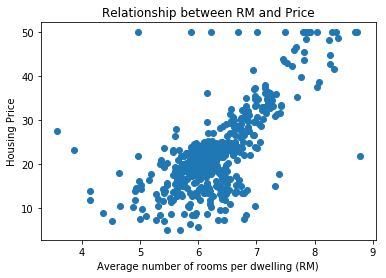

In [12]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()
# As can be seen that there is a positive correlation between RM and housing prices.

<h4> Predicting Prices </h4> To calculate the predicted prices (Y_i) we use <i>lm.predict</i>. Then we print the first 5 housing prices predicted by our model. We then plot a scatter plot to compare true prices vs the predicted prices.

In [13]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

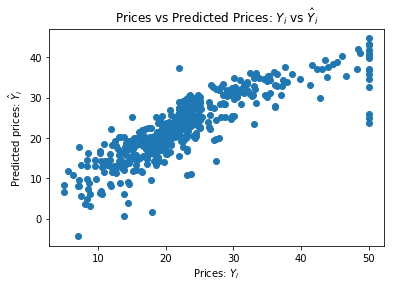

In [14]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [15]:
#We can notice that there is some error in  the prediction as the housing prices increase.
#Lets calculate the mean squared error.
mseFull = np.mean((bos.PRICE - lm.predict(X))** 2)
print(mseFull)

21.89777921768749


But if we fit linear regression for <b>one feature</b> the error will be very high. Lets take the feature ‘PTRATIO’ and calculate the mean squared error.

In [16]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']]))** 2)
print(msePTRATIO)

62.65220001376927


The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

<b> To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data. </b>

<b> ** To-Do 2: Plot the residuals for training and test datasets** </b>


## We now switch to working with wellness data from intagram
You need to get the 'visual_well_being_pickle_format.zip' file from Canvas and unzip it to run the rest of this section. 

If for some reason the pickle format is not readable to you, you can try the feather format files found in visual_well_being_feather_format.zip . The data should be identical between formats. However, when I tried this on Windows 10, installing the relevant package - feather-format - destroyed my anaconda installation. Use at your own risk.

In [17]:
#This line is only needed if you intend to use the feather format
#import feather 
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix



In [18]:
#Read the individual data frames
#The default is pickle format. If you are working with the feather format, then the comments on each line indicate how to use it
anp_df = pd.read_pickle(r'use_case_2\anp.pickle') #feather.read_dataframe('data_science_case/anp.feather')
face_df = pd.read_pickle(r'use_case_2\face.pickle') #feather.read_dataframe('data_science_case/face.feather')
image_df = pd.read_pickle(r'use_case_2\image_data.pickle') #feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = pd.read_pickle(r'use_case_2\image_metrics.pickle') #feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = pd.read_pickle(r'use_case_2\object_labels.pickle') #feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = pd.read_pickle(r'use_case_2\survey.pickle') #feather.read_dataframe('data_science_case/survey.feather')

In [19]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')

In [20]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,-0.034337,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,0.026916,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,-0.315009,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_followed_by,-0.044179,0.032737,-0.010293,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,-0.014647,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,0.022166,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,0.024249,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,-0.059100,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,-0.020458,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,-0.025877,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657
face_id,-0.034337,0.026916,-0.315009,-0.014647,0.022166,0.024249,-0.059100,-0.020458,-0.025877,1.000000,...,0.036708,0.013296,-0.003710,0.005873,-0.005058,-0.023133,-0.011505,0.009042,-0.027795,0.005240


<b>To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated.</b>

<b>To-Do 4: Calculate the Spearman rank for the attributes. </b>

# ASSIGNMENT

Case Assignment: Predicting Well-being from Instagram data

#### Introduction
A growing proportion of social interactions are now mediated by digital services and devices. Such digitally mediated behaviors can easily be recorded and analyzed, fueling the emergence of computational marketing and social science. Researchers have used social media to predict individual and aggregated measures of heart attacks, political preference, personality and perhaps most importantly well-being. Well-being, which is defined as peoples’ positive evaluations of their lives, includes positive emotion, engagement, satisfaction, and meaning (Diener and Seligman, 2004). 

Previous research, however, has been based on text input, usually based on Facebook and Twitter. Your assignment is to assess the relationship between visual social media data, in this case Instagram, and well-being (Park et al 2016).  While a recent study (Reece and Danforth 2016) demonstrated a relationship between Instagram user posts and clinical markers of depression, no study has however looked at the relation between Instagram posts and well-being. Well-being is measured through a survey using the PERMA scale (Seligman 2012). Just like the “state” of an airplane is not given by a single indicator but instead by a variety of different indicators (altitude, speed, head-ing, fuel consumption)  — well-being is best measured as separate, correlated dimensions, Positive  Emotions,  Engagement,  Relationships,  Meaning,  and Accomplish (PERMA). 

#### Data
Users from crowdsourcing platforms (Mechanical Turk and Microwork) where asked to login with their Instagram account and fill out the survey including the PERMA scale. Next we extracted all images a user posted and extracted different features for each image. Please see the data document for a description of individual variables. 

#### Assignment
Your assignment is to assess the nature of the relationship between user Instagram activity and the content of the images and their well-being. At your disposal you have data on the user, images and their metadata and features extracted from the images (e.g. sentiment, faces). 

In your analysis consider the individual aspects of well-being (separate PERMA factors) as well a the PERMA score itself. Consider the hierarchical relationship between the predictor variables (user -> images -> image features) and please note that the dependent variable only has 160 observations. (= filled out questionnaires) The sample size thus might require additional procedures to ensure you can draw confident conclusions from your analysis.

References below might provide interesting methods for your analysis. 

#### Suggested starting point

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.


#### References

Diener, Ed and Martin E. P. Seligman (2004), “Beyond Money: Toward an Economy of Well-Being,” Psychological Science in the Public Interest: A Journal of the American Psychological Society, 5, 1, 1–31.

Park, G., D. Stillwell, and M. Kosinski (2016), “Predicting Individual Well-Being through the Language of Social Media,” : Proceedings of the …, davidstillwell.co.uk, http://www.davidstillwell.co.uk/articles/2016_predicting_wellbeing.pdf.

Reece, Andrew G. and Christopher M. Danforth (2016), “Instagram Photos Reveal Predictive Markers of Depression,” arXiv [cs.SI], arXiv. http://arxiv.org/abs/1608.03282. 

Seligman, Martin E. P. (2012), Flourish: A Visionary New Understanding of Happiness and Well-Being, Simon and Schuster.


